In [32]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

Data Wrangling

In [33]:
df = pd.read_excel('supermarket_sales.xlsx')

In [34]:
df.shape

(1000, 17)

In [35]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [36]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'tax_5%', 'total', 'date',
       'time', 'payment', 'cogs', 'gross_margin_percentage', 'gross_income',
       'rating'],
      dtype='object')

In [37]:
df = df.applymap(lambda x: x.lower() if type(x) == str else x)

C:\Users\Nour Mansour\AppData\Local\Temp\ipykernel_7864\860712376.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if type(x) == str else x)


In [38]:
df["date"] = pd.to_datetime(df["date"])

In [39]:
df.dtypes

invoice_id                         object
branch                             object
city                               object
customer_type                      object
gender                             object
product_line                       object
unit_price                        float64
quantity                            int64
tax_5%                            float64
total                             float64
date                       datetime64[ns]
time                               object
payment                            object
cogs                              float64
gross_margin_percentage           float64
gross_income                      float64
rating                            float64
dtype: object

In [40]:
df = df[ ["city", "branch", "date","time", "invoice_id","product_line", "unit_price", "quantity", "tax_5%", "total", "payment",  "customer_type", "gender",
       "rating", "cogs", "gross_margin_percentage", "gross_income"]]

In [41]:
df

,city,branch,date,time,invoice_id,product_line,unit_price,quantity,tax_5%,total,payment,customer_type,gender,rating,cogs,gross_margin_percentage,gross_income
0,mandalay,b,2019-02-20,13:27:00,692-92-5582,food_and_beverages,54.84,3,8.226,172.746,credit card,member,female,5.9,164.52,4.761905,8.226
1,mandalay,b,2019-06-02,18:07:00,351-62-0822,fashion_accessories,14.48,4,2.896,60.816,ewallet,member,female,4.5,57.92,4.761905,2.896
2,mandalay,b,2019-09-03,17:03:00,529-56-3974,electronic_accessories,25.51,4,5.102,107.142,cash,member,male,6.8,102.04,4.761905,5.102
3,mandalay,b,2019-01-15,16:19:00,299-46-1805,sports_and_travel,93.72,6,28.116,590.436,cash,member,female,4.5,562.32,4.761905,28.116
4,mandalay,b,2019-11-03,15:30:00,319-50-3348,home_and_lifestyle,40.30,2,4.030,84.630,ewallet,normal,female,4.4,80.60,4.761905,4.030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,yangon,a,2019-03-22,19:06:00,886-18-2897,food_and_beverages,56.56,5,14.140,296.940,credit card,normal,female,4.5,282.80,4.761905,14.140
996,yangon,a,2019-10-03,20:46:00,745-74-0715,electronic_accessories,58.03,2,5.803,121.863,ewallet,normal,male,8.8,116.06,4.761905,5.803
997,yangon,a,2019-09-02,13:22:00,727-02-1313,food_and_beverages,31.84,1,1.592,33.432,cash,member,male,7.7,31.84,4.761905,1.592
998,yangon,a,2019-02-22,15:33:00,347-56-2442,home_and_lifestyle,65.82,1,3.291,69.111,cash,normal,male,4.1,65.82,4.761905,3.291


In [42]:
df.sort_values(["branch","city","date"], ascending=[True,True,True], inplace=True)

In [43]:
df.groupby("city")["branch"].unique()

city
mandalay     [b]
naypyitaw    [c]
yangon       [a]
Name: branch, dtype: object

In [44]:
df.groupby("product_line").get_group("health_and_beauty")['invoice_id']

854    443-82-0585
975    397-25-8725
916    787-87-2010
807    269-10-8440
951    160-22-2687
          ...     
632    450-42-3339
349    838-78-4295
576    607-65-2441
441    704-20-4138
404    699-01-4164
Name: invoice_id, Length: 152, dtype: object

In [45]:
df[['unit_price'	,'quantity'	,'tax_5%',	'total',	'rating']].describe()

,unit_price,quantity,tax_5%,total,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,6.97270
std,26.494628,2.923431,11.708825,245.885335,1.71858
min,10.080000,1.000000,0.508500,10.678500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,5.50000
50%,55.230000,5.000000,12.088000,253.848000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,10.00000


In [46]:
df.groupby("product_line")['unit_price'].describe()

,count,mean,std,min,25%,50%,75%,max
product_line,,,,,,,,
electronic_accessories,170.0,53.551588,26.748102,10.56,27.9825,51.505,75.9025,99.73
fashion_accessories,178.0,57.153652,26.666294,10.18,35.5200,55.090,81.1025,99.89
food_and_beverages,174.0,56.008851,26.270242,10.13,33.4675,53.995,78.7375,99.79
health_and_beauty,152.0,54.854474,26.353058,10.08,32.4250,57.405,76.1350,99.96
home_and_lifestyle,160.0,55.316938,26.206963,10.53,34.3125,55.590,77.5225,99.92
sports_and_travel,166.0,56.993253,26.905015,10.17,34.4175,58.650,80.6800,99.96


In [47]:
df.groupby("product_line")['quantity'].describe()

,count,mean,std,min,25%,50%,75%,max
product_line,,,,,,,,
electronic_accessories,170.0,5.711765,2.909764,1.0,3.00,6.0,8.0,10.0
fashion_accessories,178.0,5.067416,3.102023,1.0,2.00,5.0,8.0,10.0
food_and_beverages,174.0,5.471264,2.872388,1.0,3.00,5.0,8.0,10.0
health_and_beauty,152.0,5.618421,2.846944,1.0,3.00,6.0,8.0,10.0
home_and_lifestyle,160.0,5.693750,2.821741,1.0,3.75,6.0,8.0,10.0
sports_and_travel,166.0,5.542169,2.951327,1.0,3.00,6.0,8.0,10.0


In [48]:
df.groupby("product_line")['tax_5%'].describe()

,count,mean,std,min,25%,50%,75%,max
product_line,,,,,,,,
electronic_accessories,170.0,15.220597,11.711696,1.2725,5.643000,11.48650,22.658250,44.8785
fashion_accessories,178.0,14.528062,11.598292,0.6045,5.055000,10.07850,21.080500,49.6500
food_and_beverages,174.0,15.365310,11.769418,1.0790,6.424000,12.02325,21.554625,49.2600
health_and_beauty,152.0,15.411572,11.311372,0.8875,5.984125,12.96700,23.462875,45.2500
home_and_lifestyle,160.0,16.030331,12.123841,0.6990,6.003625,12.29475,23.417250,48.7500
sports_and_travel,166.0,15.812630,11.827397,0.5085,6.345750,12.90150,22.746875,47.7200


In [49]:
df.groupby("product_line")['total'].describe()

,count,mean,std,min,25%,50%,75%,max
product_line,,,,,,,,
electronic_accessories,170.0,319.632538,245.945626,26.7225,118.503000,241.21650,475.823250,942.4485
fashion_accessories,178.0,305.089298,243.564130,12.6945,106.155000,211.64850,442.690500,1042.6500
food_and_beverages,174.0,322.671517,247.157780,22.6590,134.904000,252.48825,452.647125,1034.4600
health_and_beauty,152.0,323.643020,237.538815,18.6375,125.666625,272.30700,492.720375,950.2500
home_and_lifestyle,160.0,336.636956,254.600671,14.6790,126.076125,258.18975,491.762250,1023.7500
sports_and_travel,166.0,332.065220,248.375328,10.6785,133.260750,270.93150,477.684375,1002.1200


In [50]:
df.groupby("product_line")['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
product_line,,,,,,,,
electronic_accessories,170.0,6.924706,1.702028,4.0,5.500,6.70,8.35,10.0
fashion_accessories,178.0,7.029213,1.713437,4.0,5.600,6.95,8.50,9.9
food_and_beverages,174.0,7.113218,1.715181,4.0,5.800,7.30,8.60,9.9
health_and_beauty,152.0,7.003289,1.763817,4.0,5.450,7.20,8.40,10.0
home_and_lifestyle,160.0,6.837500,1.718627,4.1,5.400,7.00,8.20,9.9
sports_and_travel,166.0,6.916265,1.714477,4.0,5.525,6.70,8.45,10.0


Plotting the Data

In [51]:
sns.set_theme(style='darkgrid')

Histogram

<Axes: xlabel='unit_price', ylabel='Count'>

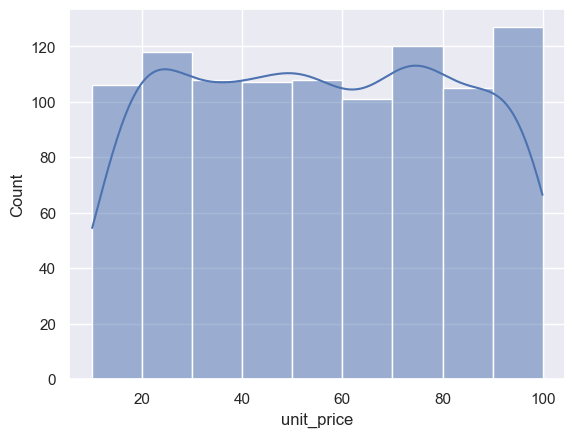

In [52]:
sns.histplot(data=df,x='unit_price',kde=True,binwidth=10,binrange=(10,100),stat='count',discrete=False)

<Axes: xlabel='unit_price', ylabel='Probability'>

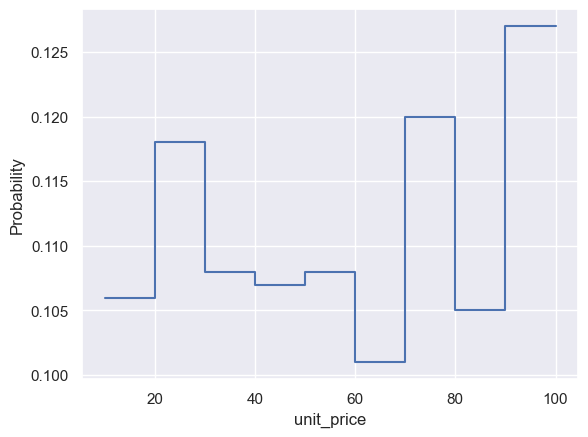

In [53]:
sns.histplot(data=df,x='unit_price',binwidth=10,binrange=(10,100),stat='probability',discrete=False,element='step',fill=False)

<Axes: xlabel='unit_price', ylabel='Count'>

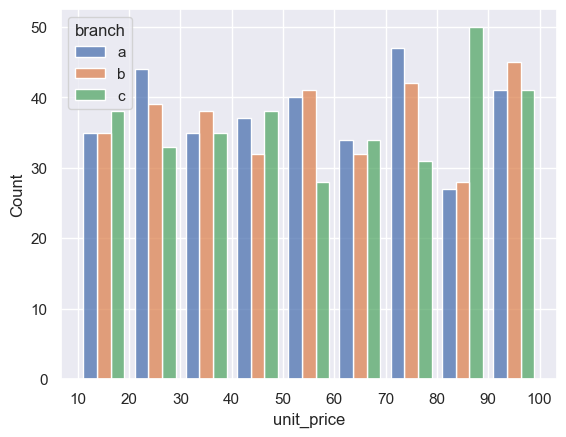

In [54]:
plt.xticks(range(10,101,10))
sns.histplot(data=df,x='unit_price',binwidth=10,hue='branch',multiple='dodge',shrink=0.8) 


Kernal Density Estimation 

<Axes: xlabel='unit_price', ylabel='Density'>

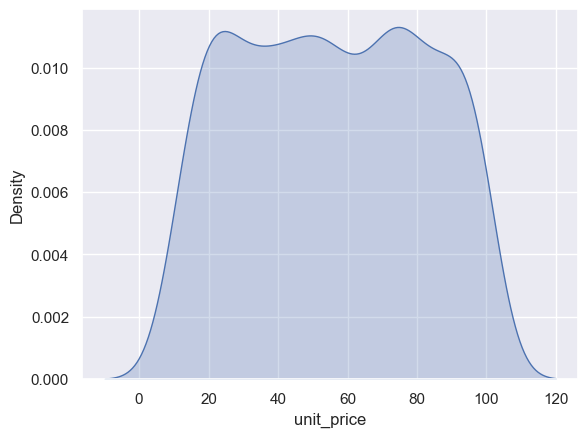

In [55]:
sns.kdeplot(df['unit_price'],fill=True)

Kernal Density Estimation (bivariate)

<Axes: xlabel='unit_price', ylabel='gross_income'>

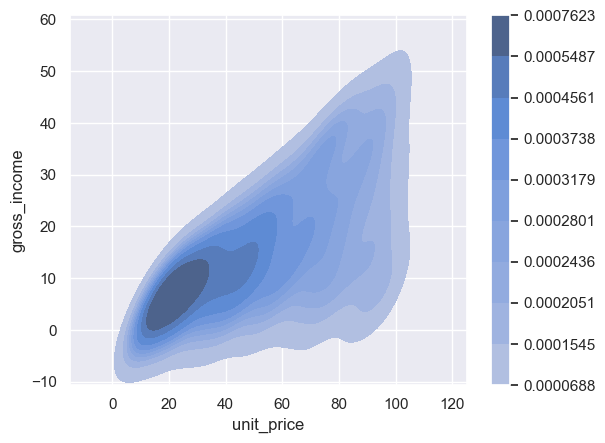

In [56]:
sns.kdeplot(data=df,x='unit_price', y='gross_income',fill=True,cbar=True)